## code to extract average temperature in celsius degrees for each municipality in Colombia between 2007 and 2018
* golbal temperature map from worldclim: https://www.worldclim.org/data/worldclim21.html
* Municipalities from DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/
* Built in google collab using R as language
- Authors: 
** David Restrepo: dsrestrepo@unicauca.edu.co
** Dana Moukheiber: danamouk@buffalo.edu 

In [1]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
#  install the libraries
install.packages("raster")
install.packages("maptools")
install.packages("rgdal")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/raster_3.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 575921 bytes (562 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [4]:
%%R
# load the libraries
library(raster)
library(maptools)
library(rgdal)

R[write to console]: Loading required package: sp

R[write to console]: Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

R[write to console]: rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



# data taken from:
* worldclim: https://www.worldclim.org/data/worldclim21.html

You'll find .zip files, each .zip file when is unziped contains a folder with data in .tif format of a specific data for example in this case temperature. 
There is a file for each month, in the case of temperature we have minimum and maximum for each month so we need to calculate the average

## Data of temperature in 2018

In [5]:
%%R
#Jan
map_temperature_max_jan_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-01.tif")
map_temperature_min_jan_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-01.tif")

#Feb
map_temperature_max_feb_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-02.tif")
map_temperature_min_feb_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-02.tif")

#Mar
map_temperature_max_mar_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-03.tif")
map_temperature_min_mar_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-03.tif")

#Apr
map_temperature_max_apr_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-04.tif")
map_temperature_min_apr_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-04.tif")

#May
map_temperature_max_may_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-05.tif")
map_temperature_min_may_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-05.tif")

#Jun
map_temperature_max_jun_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-06.tif")
map_temperature_min_jun_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-06.tif")

#Jul
map_temperature_max_jul_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-07.tif")
map_temperature_min_jul_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-07.tif")

#Aug
map_temperature_max_aug_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-08.tif")
map_temperature_min_aug_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-08.tif")

#Sep
map_temperature_max_sep_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-09.tif")
map_temperature_min_sep_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-09.tif")

#Oct
map_temperature_max_oct_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-10.tif")
map_temperature_min_oct_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-10.tif")

#Nov
map_temperature_max_nov_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-11.tif")
map_temperature_min_nov_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-11.tif")

#Dec
map_temperature_max_dec_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2018-12.tif")
map_temperature_min_dec_18 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2018-12.tif")


# calculate average temperature
map_temperature_average_jan_18 = ((map_temperature_max_jan_18 + map_temperature_min_jan_18) / 2)
map_temperature_average_feb_18 = ((map_temperature_max_feb_18 + map_temperature_min_feb_18) / 2)
map_temperature_average_mar_18 = ((map_temperature_max_mar_18 + map_temperature_min_mar_18) / 2)
map_temperature_average_apr_18 = ((map_temperature_max_apr_18 + map_temperature_min_apr_18) / 2)
map_temperature_average_may_18 = ((map_temperature_max_may_18 + map_temperature_min_may_18) / 2)
map_temperature_average_jun_18 = ((map_temperature_max_jun_18 + map_temperature_min_jun_18) / 2)
map_temperature_average_jul_18 = ((map_temperature_max_jul_18 + map_temperature_min_jul_18) / 2)
map_temperature_average_aug_18 = ((map_temperature_max_aug_18 + map_temperature_min_aug_18) / 2)
map_temperature_average_sep_18 = ((map_temperature_max_sep_18 + map_temperature_min_sep_18) / 2)
map_temperature_average_oct_18 = ((map_temperature_max_oct_18 + map_temperature_min_oct_18) / 2)
map_temperature_average_nov_18 = ((map_temperature_max_nov_18 + map_temperature_min_nov_18) / 2)
map_temperature_average_dec_18 = ((map_temperature_max_dec_18 + map_temperature_min_dec_18) / 2)


OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp", layer: "MPM_FuenteCensal_2018"
with 1122 features
It has 53 fields


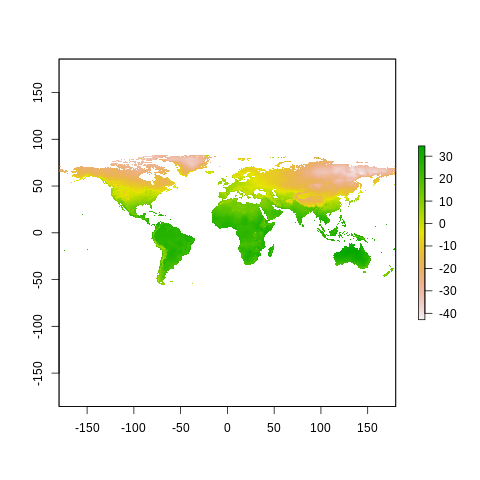

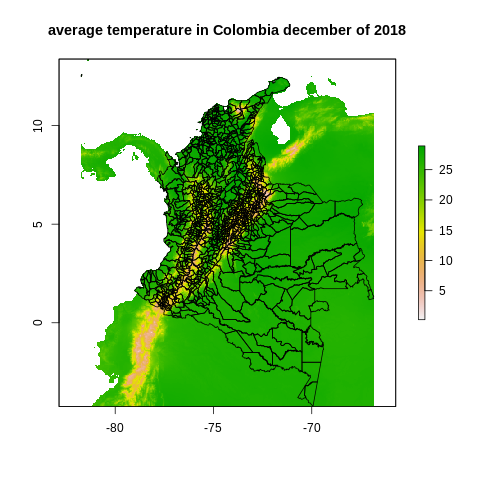

In [6]:
%%R
# Each file looks like this:
plot(map_temperature_average_dec_18)

# load a polygon (municipalities)
colombian_map <- readOGR("/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp")

# cut map to obtain colombian map of temperature
map_temperature_average_colombia_dec_18 <- crop(map_temperature_average_dec_18, colombian_map)
plot(map_temperature_average_colombia_dec_18, main = "average temperature in Colombia december of 2018")
plot(colombian_map, add = TRUE)

# load the municipalities dataframe to take the value in each munucipality:
Data taken from:
* DANE: https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/

In [7]:
%%R
# Read coordinates csv
municipalities_df <- read.csv('/content/drive/MyDrive/Dengue_MAPS/polygons/DIVIPOLA_Municipios.csv', header = TRUE, sep = ";")

# Data preprocessing
municipalities_df = na.omit(municipalities_df)

#Fix DPTO names 
municipalities_df$NOM_DPTO = gsub("\xc1", "A", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xc9", "E", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xcd", "I", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xd3", "O", municipalities_df$NOM_DPTO)
municipalities_df$NOM_DPTO = gsub("\xda", "U", municipalities_df$NOM_DPTO) 
municipalities_df$NOM_DPTO = gsub("\xd1", "N", municipalities_df$NOM_DPTO)

#Fix MPIO names
municipalities_df$NOM_MPIO = gsub("\xc1", "A", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xc9", "E", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xcd", "I", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xd3", "O", municipalities_df$NOM_MPIO)
municipalities_df$NOM_MPIO = gsub("\xda", "U", municipalities_df$NOM_MPIO) # pendiente
municipalities_df$NOM_MPIO = gsub("\xd1", "N", municipalities_df$NOM_MPIO)


#Fix coordinates
#change , by .
municipalities_df$LONGITUD = gsub(",", ".", municipalities_df$LONGITUD)
municipalities_df$LATITUD = gsub(",", ".", municipalities_df$LATITUD)

#change coordinates from string to numeric
municipalities_df[,'LONGITUD'] = as.numeric(municipalities_df[,'LONGITUD'])
municipalities_df[,'LATITUD'] = as.numeric(municipalities_df[,'LATITUD'])
head(municipalities_df)

  COD_DPTO  NOM_DPTO COD_MPIO   NOM_MPIO      TIPO  LATITUD  LONGITUD
1        5 ANTIOQUIA     5001   MEDELLIN Municipio 6.257590 -75.61103
2        5 ANTIOQUIA     5002  ABEJORRAL Municipio 5.803728 -75.43847
3        5 ANTIOQUIA     5004   ABRIAQUI Municipio 6.627569 -76.08598
4        5 ANTIOQUIA     5021 ALEJANDRIA Municipio 6.365534 -75.09060
5        5 ANTIOQUIA     5030      AMAGA Municipio 6.032922 -75.70800
6        5 ANTIOQUIA     5031     AMALFI Municipio 6.977789 -74.98124


# Extract data from 2018

In [8]:
%%R
# Extracting data

# Extracting data of temperature in january for each municipality 
temperature_aux_df = extract(map_temperature_average_jan_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
# Append that data of temperature to municipalities
temperature_df = cbind(temperature_aux_df, municipalities_df)
# Rename
colnames(temperature_df)[2] = "TEMPERATURE_jan_18"
# Delete the id column
temperature_df = subset (temperature_df, select = -ID)


#feb
temperature_aux_df = extract(map_temperature_average_feb_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_18"
temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_18"
temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_18"
temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_18"
temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_18"
temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_18"
temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_18"
temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_18"
temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_18"
temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_18"
temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_18, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_18"
temperature_df = subset (temperature_df, select = -ID)

head(temperature_df)

  TEMPERATURE_dec_18 TEMPERATURE_nov_18 TEMPERATURE_oct_18 TEMPERATURE_sep_18
1           20.93635           20.88670           20.74842           21.34720
2           16.62724           16.67430           16.49509           17.01187
3           17.08042           17.23153           16.91137           17.35633
4           20.57412           20.68789           20.72587           21.23034
5           20.71726           20.62511           20.55842           21.02646
6           21.47109           21.55050           21.49748           22.01488
  TEMPERATURE_aug_18 TEMPERATURE_jul_18 TEMPERATURE_jun_18 TEMPERATURE_may_18
1           21.71943           21.95217           21.45715           21.03736
2           17.10338           17.06330           17.03629           16.49547
3           17.51211           17.84316           17.52903           17.22166
4           21.42589           21.65237           21.37741           21.02577
5           21.38057           21.56099           21.14993      

# Extract data from 2017

In [9]:
%%R
#2017

#Jan
map_temperature_max_jan_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-01.tif")
map_temperature_min_jan_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-01.tif")

#Feb
map_temperature_max_feb_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-02.tif")
map_temperature_min_feb_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-02.tif")

#Mar
map_temperature_max_mar_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-03.tif")
map_temperature_min_mar_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-03.tif")

#Apr
map_temperature_max_apr_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-04.tif")
map_temperature_min_apr_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-04.tif")

#May
map_temperature_max_may_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-05.tif")
map_temperature_min_may_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-05.tif")

#Jun
map_temperature_max_jun_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-06.tif")
map_temperature_min_jun_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-06.tif")

#Jul
map_temperature_max_jul_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-07.tif")
map_temperature_min_jul_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-07.tif")

#Aug
map_temperature_max_aug_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-08.tif")
map_temperature_min_aug_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-08.tif")

#Sep
map_temperature_max_sep_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-09.tif")
map_temperature_min_sep_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-09.tif")

#Oct
map_temperature_max_oct_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-10.tif")
map_temperature_min_oct_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-10.tif")

#Nov
map_temperature_max_nov_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-11.tif")
map_temperature_min_nov_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-11.tif")

#Dec
map_temperature_max_dec_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2017-12.tif")
map_temperature_min_dec_17 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2017-12.tif")


# calculate average temperature
map_temperature_average_jan_17 = ((map_temperature_max_jan_17 + map_temperature_min_jan_17) / 2)
map_temperature_average_feb_17 = ((map_temperature_max_feb_17 + map_temperature_min_feb_17) / 2)
map_temperature_average_mar_17 = ((map_temperature_max_mar_17 + map_temperature_min_mar_17) / 2)
map_temperature_average_apr_17 = ((map_temperature_max_apr_17 + map_temperature_min_apr_17) / 2)
map_temperature_average_may_17 = ((map_temperature_max_may_17 + map_temperature_min_may_17) / 2)
map_temperature_average_jun_17 = ((map_temperature_max_jun_17 + map_temperature_min_jun_17) / 2)
map_temperature_average_jul_17 = ((map_temperature_max_jul_17 + map_temperature_min_jul_17) / 2)
map_temperature_average_aug_17 = ((map_temperature_max_aug_17 + map_temperature_min_aug_17) / 2)
map_temperature_average_sep_17 = ((map_temperature_max_sep_17 + map_temperature_min_sep_17) / 2)
map_temperature_average_oct_17 = ((map_temperature_max_oct_17 + map_temperature_min_oct_17) / 2)
map_temperature_average_nov_17 = ((map_temperature_max_nov_17 + map_temperature_min_nov_17) / 2)
map_temperature_average_dec_17 = ((map_temperature_max_dec_17 + map_temperature_min_dec_17) / 2)


In [10]:
%%R
# Extracting data 2017

#jan
temperature_aux_df = extract(map_temperature_average_jan_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_17"

temperature_df = subset (temperature_df, select = -ID)


#feb
temperature_aux_df = extract(map_temperature_average_feb_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_17"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_17"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_17"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_17"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_17"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_17"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_17"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_17"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_17"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_17"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_17, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_17"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_17 TEMPERATURE_nov_17 TEMPERATURE_oct_17 TEMPERATURE_sep_17
1            20.83635           20.93610           21.05527           21.84807
2            16.52178           16.69148           16.70213           17.45719
3            16.98042           17.19742           17.23333           17.79704
4            20.48020           20.70743           20.93629           21.72296
5            20.58002           20.63501           20.82951           21.52073
6            21.47110           21.56517           21.77230           22.49197
7            16.99580           17.05631           17.13742           17.86597
8            19.90337           20.00988           20.11769           20.83275
9            17.95148           18.09609           18.39491           18.85531
10           22.28211           22.30965           22.51212           23.06568
   TEMPERATURE_aug_17 TEMPERATURE_jul_17 TEMPERATURE_jun_17 TEMPERATURE_may_17
1            21.22065           22.15156           2

## This process takes too much RAM, so space must be freed

In [12]:
%%R
# free Ram space
# 2018
rm(map_temperature_average_jan_18)
rm(map_temperature_max_jan_18)
rm(map_temperature_min_jan_18)
rm(map_temperature_average_feb_18)
rm(map_temperature_max_feb_18)
rm(map_temperature_min_feb_18)
rm(map_temperature_average_mar_18)
rm(map_temperature_max_mar_18)
rm(map_temperature_min_mar_18)
rm(map_temperature_average_apr_18)
rm(map_temperature_max_apr_18)
rm(map_temperature_min_apr_18)
rm(map_temperature_average_may_18)
rm(map_temperature_max_may_18)
rm(map_temperature_min_may_18)
rm(map_temperature_average_jun_18)
rm(map_temperature_max_jun_18)
rm(map_temperature_min_jun_18)
rm(map_temperature_average_jul_18)
rm(map_temperature_max_jul_18)
rm(map_temperature_min_jul_18)
rm(map_temperature_average_aug_18)
rm(map_temperature_max_aug_18)
rm(map_temperature_min_aug_18)
rm(map_temperature_average_sep_18)
rm(map_temperature_max_sep_18)
rm(map_temperature_min_sep_18)
rm(map_temperature_average_oct_18)
rm(map_temperature_max_oct_18)
rm(map_temperature_min_oct_18)
rm(map_temperature_average_nov_18)
rm(map_temperature_max_nov_18)
rm(map_temperature_min_nov_18)
rm(map_temperature_average_dec_18)
rm(map_temperature_max_dec_18)
rm(map_temperature_min_dec_18)

# 2017
rm(map_temperature_average_jan_17)
rm(map_temperature_max_jan_17)
rm(map_temperature_min_jan_17)
rm(map_temperature_average_feb_17)
rm(map_temperature_max_feb_17)
rm(map_temperature_min_feb_17)
rm(map_temperature_average_mar_17)
rm(map_temperature_max_mar_17)
rm(map_temperature_min_mar_17)
rm(map_temperature_average_apr_17)
rm(map_temperature_max_apr_17)
rm(map_temperature_min_apr_17)
rm(map_temperature_average_may_17)
rm(map_temperature_max_may_17)
rm(map_temperature_min_may_17)
rm(map_temperature_average_jun_17)
rm(map_temperature_max_jun_17)
rm(map_temperature_min_jun_17)
rm(map_temperature_average_jul_17)
rm(map_temperature_max_jul_17)
rm(map_temperature_min_jul_17)
rm(map_temperature_average_aug_17)
rm(map_temperature_max_aug_17)
rm(map_temperature_min_aug_17)
rm(map_temperature_average_sep_17)
rm(map_temperature_max_sep_17)
rm(map_temperature_min_sep_17)
rm(map_temperature_average_oct_17)
rm(map_temperature_max_oct_17)
rm(map_temperature_min_oct_17)
rm(map_temperature_average_nov_17)
rm(map_temperature_max_nov_17)
rm(map_temperature_min_nov_17)
rm(map_temperature_average_dec_17)
rm(map_temperature_max_dec_17)
rm(map_temperature_min_dec_17)

# Extract data from 2016

In [13]:
%%R
#2016

#Jan
map_temperature_max_jan_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-01.tif")
map_temperature_min_jan_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-01.tif")

#Feb
map_temperature_max_feb_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-02.tif")
map_temperature_min_feb_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-02.tif")

#Mar
map_temperature_max_mar_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-03.tif")
map_temperature_min_mar_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-03.tif")

#Apr
map_temperature_max_apr_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-04.tif")
map_temperature_min_apr_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-04.tif")

#May
map_temperature_max_may_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-05.tif")
map_temperature_min_may_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-05.tif")

#Jun
map_temperature_max_jun_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-06.tif")
map_temperature_min_jun_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-06.tif")

#Jul
map_temperature_max_jul_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-07.tif")
map_temperature_min_jul_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-07.tif")

#Aug
map_temperature_max_aug_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-08.tif")
map_temperature_min_aug_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-08.tif")

#Sep
map_temperature_max_sep_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-09.tif")
map_temperature_min_sep_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-09.tif")

#Oct
map_temperature_max_oct_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-10.tif")
map_temperature_min_oct_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-10.tif")

#Nov
map_temperature_max_nov_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-11.tif")
map_temperature_min_nov_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-11.tif")

#Dec
map_temperature_max_dec_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2016-12.tif")
map_temperature_min_dec_16 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2016-12.tif")


# calculate average temperature
map_temperature_average_jan_16 = ((map_temperature_max_jan_16 + map_temperature_min_jan_16) / 2)
map_temperature_average_feb_16 = ((map_temperature_max_feb_16 + map_temperature_min_feb_16) / 2)
map_temperature_average_mar_16 = ((map_temperature_max_mar_16 + map_temperature_min_mar_16) / 2)
map_temperature_average_apr_16 = ((map_temperature_max_apr_16 + map_temperature_min_apr_16) / 2)
map_temperature_average_may_16 = ((map_temperature_max_may_16 + map_temperature_min_may_16) / 2)
map_temperature_average_jun_16 = ((map_temperature_max_jun_16 + map_temperature_min_jun_16) / 2)
map_temperature_average_jul_16 = ((map_temperature_max_jul_16 + map_temperature_min_jul_16) / 2)
map_temperature_average_aug_16 = ((map_temperature_max_aug_16 + map_temperature_min_aug_16) / 2)
map_temperature_average_sep_16 = ((map_temperature_max_sep_16 + map_temperature_min_sep_16) / 2)
map_temperature_average_oct_16 = ((map_temperature_max_oct_16 + map_temperature_min_oct_16) / 2)
map_temperature_average_nov_16 = ((map_temperature_max_nov_16 + map_temperature_min_nov_16) / 2)
map_temperature_average_dec_16 = ((map_temperature_max_dec_16 + map_temperature_min_dec_16) / 2)


In [14]:
%%R
# Extracting data 2016

#jan
temperature_aux_df = extract(map_temperature_average_jan_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_16"

temperature_df = subset (temperature_df, select = -ID)


#feb
temperature_aux_df = extract(map_temperature_average_feb_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_16"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_16"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_16"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_16"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_16"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_16"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_16"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_16"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_16"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_16"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_16, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_16"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_16 TEMPERATURE_nov_16 TEMPERATURE_oct_16 TEMPERATURE_sep_16
1            20.96639           20.76526           21.30137           21.64538
2            16.64600           16.55945           16.92478           17.26266
3            17.08459           17.07416           17.45642           17.67638
4            20.67829           20.60439           21.26433           21.61576
5            20.70685           20.48475           21.02248           21.30380
6            21.58351           21.46101           22.07230           22.40021
7            17.14944           16.95631           17.28742           17.63811
8            20.02030           19.84140           20.30875           20.60176
9            18.09758           17.98567           18.69491           18.79316
10           22.38653           22.23882           22.81212           22.99927
   TEMPERATURE_aug_16 TEMPERATURE_jul_16 TEMPERATURE_jun_16 TEMPERATURE_may_16
1            22.60034           22.17179           2

# Extract data from 2015

In [15]:
%%R
#2015

#Jan
map_temperature_max_jan_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-01.tif")
map_temperature_min_jan_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-01.tif")

#Feb
map_temperature_max_feb_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-02.tif")
map_temperature_min_feb_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-02.tif")

#Mar
map_temperature_max_mar_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-03.tif")
map_temperature_min_mar_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-03.tif")

#Apr
map_temperature_max_apr_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-04.tif")
map_temperature_min_apr_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-04.tif")

#May
map_temperature_max_may_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-05.tif")
map_temperature_min_may_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-05.tif")

#Jun
map_temperature_max_jun_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-06.tif")
map_temperature_min_jun_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-06.tif")

#Jul
map_temperature_max_jul_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-07.tif")
map_temperature_min_jul_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-07.tif")

#Aug
map_temperature_max_aug_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-08.tif")
map_temperature_min_aug_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-08.tif")

#Sep
map_temperature_max_sep_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-09.tif")
map_temperature_min_sep_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-09.tif")

#Oct
map_temperature_max_oct_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-10.tif")
map_temperature_min_oct_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-10.tif")

#Nov
map_temperature_max_nov_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-11.tif")
map_temperature_min_nov_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-11.tif")

#Dec
map_temperature_max_dec_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2015-12.tif")
map_temperature_min_dec_15 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2015-12.tif")


# calculate average temperature
map_temperature_average_jan_15 = ((map_temperature_max_jan_15 + map_temperature_min_jan_15) / 2)
map_temperature_average_feb_15 = ((map_temperature_max_feb_15 + map_temperature_min_feb_15) / 2)
map_temperature_average_mar_15 = ((map_temperature_max_mar_15 + map_temperature_min_mar_15) / 2)
map_temperature_average_apr_15 = ((map_temperature_max_apr_15 + map_temperature_min_apr_15) / 2)
map_temperature_average_may_15 = ((map_temperature_max_may_15 + map_temperature_min_may_15) / 2)
map_temperature_average_jun_15 = ((map_temperature_max_jun_15 + map_temperature_min_jun_15) / 2)
map_temperature_average_jul_15 = ((map_temperature_max_jul_15 + map_temperature_min_jul_15) / 2)
map_temperature_average_aug_15 = ((map_temperature_max_aug_15 + map_temperature_min_aug_15) / 2)
map_temperature_average_sep_15 = ((map_temperature_max_sep_15 + map_temperature_min_sep_15) / 2)
map_temperature_average_oct_15 = ((map_temperature_max_oct_15 + map_temperature_min_oct_15) / 2)
map_temperature_average_nov_15 = ((map_temperature_max_nov_15 + map_temperature_min_nov_15) / 2)
map_temperature_average_dec_15 = ((map_temperature_max_dec_15 + map_temperature_min_dec_15) / 2)

In [16]:
%%R
# Extracting data 2015

#jan
temperature_aux_df = extract(map_temperature_average_jan_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_15"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_15"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_15"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_15"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_15"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_15"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_15"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_15"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_15"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_15"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_15"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_15, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_15"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_15 TEMPERATURE_nov_15 TEMPERATURE_oct_15 TEMPERATURE_sep_15
1            22.08340           21.20068           21.55024           22.12576
2            17.83193           17.00555           17.20212           17.76969
3            18.16454           17.48284           17.65590           18.08567
4            21.74721           21.01593           21.43195           22.04380
5            21.87299           20.93136           21.32951           21.78323
6            22.65833           21.86101           22.25164           22.78112
7            18.36038           17.45423           17.60460           18.18993
8            21.18193           20.28992           20.61769           21.08692
9            19.16850           18.39609           18.82842           19.15366
10           23.45372           22.63882           22.96577           23.31907
   TEMPERATURE_aug_15 TEMPERATURE_jul_15 TEMPERATURE_jun_15 TEMPERATURE_may_15
1            22.66257           22.41970           2

## Free RAM space

In [18]:
%%R

# free Ram space
# 2016
rm(map_temperature_average_jan_16)
rm(map_temperature_max_jan_16)
rm(map_temperature_min_jan_16)
rm(map_temperature_average_feb_16)
rm(map_temperature_max_feb_16)
rm(map_temperature_min_feb_16)
rm(map_temperature_average_mar_16)
rm(map_temperature_max_mar_16)
rm(map_temperature_min_mar_16)
rm(map_temperature_average_apr_16)
rm(map_temperature_max_apr_16)
rm(map_temperature_min_apr_16)
rm(map_temperature_average_may_16)
rm(map_temperature_max_may_16)
rm(map_temperature_min_may_16)
rm(map_temperature_average_jun_16)
rm(map_temperature_max_jun_16)
rm(map_temperature_min_jun_16)
rm(map_temperature_average_jul_16)
rm(map_temperature_max_jul_16)
rm(map_temperature_min_jul_16)
rm(map_temperature_average_aug_16)
rm(map_temperature_max_aug_16)
rm(map_temperature_min_aug_16)
rm(map_temperature_average_sep_16)
rm(map_temperature_max_sep_16)
rm(map_temperature_min_sep_16)
rm(map_temperature_average_oct_16)
rm(map_temperature_max_oct_16)
rm(map_temperature_min_oct_16)
rm(map_temperature_average_nov_16)
rm(map_temperature_max_nov_16)
rm(map_temperature_min_nov_16)
rm(map_temperature_average_dec_16)
rm(map_temperature_max_dec_16)
rm(map_temperature_min_dec_16)

# 2015
rm(map_temperature_average_jan_15)
rm(map_temperature_max_jan_15)
rm(map_temperature_min_jan_15)
rm(map_temperature_average_feb_15)
rm(map_temperature_max_feb_15)
rm(map_temperature_min_feb_15)
rm(map_temperature_average_mar_15)
rm(map_temperature_max_mar_15)
rm(map_temperature_min_mar_15)
rm(map_temperature_average_apr_15)
rm(map_temperature_max_apr_15)
rm(map_temperature_min_apr_15)
rm(map_temperature_average_may_15)
rm(map_temperature_max_may_15)
rm(map_temperature_min_may_15)
rm(map_temperature_average_jun_15)
rm(map_temperature_max_jun_15)
rm(map_temperature_min_jun_15)
rm(map_temperature_average_jul_15)
rm(map_temperature_max_jul_15)
rm(map_temperature_min_jul_15)
rm(map_temperature_average_aug_15)
rm(map_temperature_max_aug_15)
rm(map_temperature_min_aug_15)
rm(map_temperature_average_sep_15)
rm(map_temperature_max_sep_15)
rm(map_temperature_min_sep_15)
rm(map_temperature_average_oct_15)
rm(map_temperature_max_oct_15)
rm(map_temperature_min_oct_15)
rm(map_temperature_average_nov_15)
rm(map_temperature_max_nov_15)
rm(map_temperature_min_nov_15)
rm(map_temperature_average_dec_15)
rm(map_temperature_max_dec_15)
rm(map_temperature_min_dec_15)

# Extract data from 2014

In [19]:
%%R
#2014

#Jan
map_temperature_max_jan_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-01.tif")
map_temperature_min_jan_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-01.tif")

#Feb
map_temperature_max_feb_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-02.tif")
map_temperature_min_feb_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-02.tif")

#Mar
map_temperature_max_mar_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-03.tif")
map_temperature_min_mar_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-03.tif")

#Apr
map_temperature_max_apr_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-04.tif")
map_temperature_min_apr_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-04.tif")

#May
map_temperature_max_may_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-05.tif")
map_temperature_min_may_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-05.tif")

#Jun
map_temperature_max_jun_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-06.tif")
map_temperature_min_jun_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-06.tif")

#Jul
map_temperature_max_jul_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-07.tif")
map_temperature_min_jul_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-07.tif")

#Aug
map_temperature_max_aug_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-08.tif")
map_temperature_min_aug_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-08.tif")

#Sep
map_temperature_max_sep_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-09.tif")
map_temperature_min_sep_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-09.tif")

#Oct
map_temperature_max_oct_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-10.tif")
map_temperature_min_oct_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-10.tif")

#Nov
map_temperature_max_nov_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-11.tif")
map_temperature_min_nov_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-11.tif")

#Dec
map_temperature_max_dec_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2014-12.tif")
map_temperature_min_dec_14 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2014-12.tif")


# calculate average temperature
map_temperature_average_jan_14 = ((map_temperature_max_jan_14 + map_temperature_min_jan_14) / 2)
map_temperature_average_feb_14 = ((map_temperature_max_feb_14 + map_temperature_min_feb_14) / 2)
map_temperature_average_mar_14 = ((map_temperature_max_mar_14 + map_temperature_min_mar_14) / 2)
map_temperature_average_apr_14 = ((map_temperature_max_apr_14 + map_temperature_min_apr_14) / 2)
map_temperature_average_may_14 = ((map_temperature_max_may_14 + map_temperature_min_may_14) / 2)
map_temperature_average_jun_14 = ((map_temperature_max_jun_14 + map_temperature_min_jun_14) / 2)
map_temperature_average_jul_14 = ((map_temperature_max_jul_14 + map_temperature_min_jul_14) / 2)
map_temperature_average_aug_14 = ((map_temperature_max_aug_14 + map_temperature_min_aug_14) / 2)
map_temperature_average_sep_14 = ((map_temperature_max_sep_14 + map_temperature_min_sep_14) / 2)
map_temperature_average_oct_14 = ((map_temperature_max_oct_14 + map_temperature_min_oct_14) / 2)
map_temperature_average_nov_14 = ((map_temperature_max_nov_14 + map_temperature_min_nov_14) / 2)
map_temperature_average_dec_14 = ((map_temperature_max_dec_14 + map_temperature_min_dec_14) / 2)

In [20]:
%%R
# Extracting data 2014

#jan
temperature_aux_df = extract(map_temperature_average_jan_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_14"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_14"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_14"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_14"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_14"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_14"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_14"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_14"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_14"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_14"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_14"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_14, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_14"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_14 TEMPERATURE_nov_14 TEMPERATURE_oct_14 TEMPERATURE_sep_14
1            21.32177           21.06882           20.98800           21.62932
2            17.02334           16.88680           16.60994           17.25875
3            17.50108           17.39725           17.15642           17.69287
4            20.93567           20.91480           20.95825           21.57427
5            21.11388           20.78761           20.73628           21.30042
6            21.85642           21.79000           21.79748           22.36037
7            17.58252           17.28131           17.10278           17.68472
8            20.42924           20.14200           20.02064           20.60029
9            18.40365           18.32959           18.43667           18.73882
10           22.67195           22.52684           22.53660           22.97297
   TEMPERATURE_aug_14 TEMPERATURE_jul_14 TEMPERATURE_jun_14 TEMPERATURE_may_14
1            22.06674           22.63759           2

# Extract data from 2013

In [21]:
%%R
#2013

#Jan
map_temperature_max_jan_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-01.tif")
map_temperature_min_jan_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-01.tif")

#Feb
map_temperature_max_feb_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-02.tif")
map_temperature_min_feb_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-02.tif")

#Mar
map_temperature_max_mar_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-03.tif")
map_temperature_min_mar_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-03.tif")

#Apr
map_temperature_max_apr_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-04.tif")
map_temperature_min_apr_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-04.tif")

#May
map_temperature_max_may_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-05.tif")
map_temperature_min_may_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-05.tif")

#Jun
map_temperature_max_jun_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-06.tif")
map_temperature_min_jun_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-06.tif")

#Jul
map_temperature_max_jul_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-07.tif")
map_temperature_min_jul_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-07.tif")

#Aug
map_temperature_max_aug_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-08.tif")
map_temperature_min_aug_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-08.tif")

#Sep
map_temperature_max_sep_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-09.tif")
map_temperature_min_sep_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-09.tif")

#Oct
map_temperature_max_oct_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-10.tif")
map_temperature_min_oct_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-10.tif")

#Nov
map_temperature_max_nov_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-11.tif")
map_temperature_min_nov_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-11.tif")

#Dec
map_temperature_max_dec_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2013-12.tif")
map_temperature_min_dec_13 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2013-12.tif")


# calculate average temperature
map_temperature_average_jan_13 = ((map_temperature_max_jan_13 + map_temperature_min_jan_13) / 2)
map_temperature_average_feb_13 = ((map_temperature_max_feb_13 + map_temperature_min_feb_13) / 2)
map_temperature_average_mar_13 = ((map_temperature_max_mar_13 + map_temperature_min_mar_13) / 2)
map_temperature_average_apr_13 = ((map_temperature_max_apr_13 + map_temperature_min_apr_13) / 2)
map_temperature_average_may_13 = ((map_temperature_max_may_13 + map_temperature_min_may_13) / 2)
map_temperature_average_jun_13 = ((map_temperature_max_jun_13 + map_temperature_min_jun_13) / 2)
map_temperature_average_jul_13 = ((map_temperature_max_jul_13 + map_temperature_min_jul_13) / 2)
map_temperature_average_aug_13 = ((map_temperature_max_aug_13 + map_temperature_min_aug_13) / 2)
map_temperature_average_sep_13 = ((map_temperature_max_sep_13 + map_temperature_min_sep_13) / 2)
map_temperature_average_oct_13 = ((map_temperature_max_oct_13 + map_temperature_min_oct_13) / 2)
map_temperature_average_nov_13 = ((map_temperature_max_nov_13 + map_temperature_min_nov_13) / 2)
map_temperature_average_dec_13 = ((map_temperature_max_dec_13 + map_temperature_min_dec_13) / 2)

In [22]:
%%R
# Extracting data 2013

#jan
temperature_aux_df = extract(map_temperature_average_jan_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_13"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_13"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_13"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_13"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_13"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_13"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_13"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_13"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_13"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_13"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_13"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_13, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_13"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_13 TEMPERATURE_nov_13 TEMPERATURE_oct_13 TEMPERATURE_sep_13
1            20.90154           20.76735           21.06361           21.34659
2            16.65224           16.51570           16.66775           16.95719
3            17.08650           17.14178           17.23941           17.39174
4            20.59608           20.61480           21.08629           21.22296
5            20.69643           20.46183           20.79306           21.02073
6            21.56884           21.47759           21.89748           22.00438
7            17.16116           17.00449           17.08742           17.47873
8            19.99738           19.82681           20.07359           20.33275
9            18.08108           18.01918           18.50759           18.35140
10           22.38471           22.21408           22.63660           22.57844
   TEMPERATURE_aug_13 TEMPERATURE_jul_13 TEMPERATURE_jun_13 TEMPERATURE_may_13
1            21.60033           21.98368           2

## Free RAM space

In [24]:
%%R

# free Ram space
# 2014
rm(map_temperature_average_jan_14)
rm(map_temperature_max_jan_14)
rm(map_temperature_min_jan_14)
rm(map_temperature_average_feb_14)
rm(map_temperature_max_feb_14)
rm(map_temperature_min_feb_14)
rm(map_temperature_average_mar_14)
rm(map_temperature_max_mar_14)
rm(map_temperature_min_mar_14)
rm(map_temperature_average_apr_14)
rm(map_temperature_max_apr_14)
rm(map_temperature_min_apr_14)
rm(map_temperature_average_may_14)
rm(map_temperature_max_may_14)
rm(map_temperature_min_may_14)
rm(map_temperature_average_jun_14)
rm(map_temperature_max_jun_14)
rm(map_temperature_min_jun_14)
rm(map_temperature_average_jul_14)
rm(map_temperature_max_jul_14)
rm(map_temperature_min_jul_14)
rm(map_temperature_average_aug_14)
rm(map_temperature_max_aug_14)
rm(map_temperature_min_aug_14)
rm(map_temperature_average_sep_14)
rm(map_temperature_max_sep_14)
rm(map_temperature_min_sep_14)
rm(map_temperature_average_oct_14)
rm(map_temperature_max_oct_14)
rm(map_temperature_min_oct_14)
rm(map_temperature_average_nov_14)
rm(map_temperature_max_nov_14)
rm(map_temperature_min_nov_14)
rm(map_temperature_average_dec_14)
rm(map_temperature_max_dec_14)
rm(map_temperature_min_dec_14)



# 2013
rm(map_temperature_average_jan_13)
rm(map_temperature_max_jan_13)
rm(map_temperature_min_jan_13)
rm(map_temperature_average_feb_13)
rm(map_temperature_max_feb_13)
rm(map_temperature_min_feb_13)
rm(map_temperature_average_mar_13)
rm(map_temperature_max_mar_13)
rm(map_temperature_min_mar_13)
rm(map_temperature_average_apr_13)
rm(map_temperature_max_apr_13)
rm(map_temperature_min_apr_13)
rm(map_temperature_average_may_13)
rm(map_temperature_max_may_13)
rm(map_temperature_min_may_13)
rm(map_temperature_average_jun_13)
rm(map_temperature_max_jun_13)
rm(map_temperature_min_jun_13)
rm(map_temperature_average_jul_13)
rm(map_temperature_max_jul_13)
rm(map_temperature_min_jul_13)
rm(map_temperature_average_aug_13)
rm(map_temperature_max_aug_13)
rm(map_temperature_min_aug_13)
rm(map_temperature_average_sep_13)
rm(map_temperature_max_sep_13)
rm(map_temperature_min_sep_13)
rm(map_temperature_average_oct_13)
rm(map_temperature_max_oct_13)
rm(map_temperature_min_oct_13)
rm(map_temperature_average_nov_13)
rm(map_temperature_max_nov_13)
rm(map_temperature_min_nov_13)
rm(map_temperature_average_dec_13)
rm(map_temperature_max_dec_13)
rm(map_temperature_min_dec_13)

# Extract data from 2012

In [25]:
%%R
#2012

#Jan
map_temperature_max_jan_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-01.tif")
map_temperature_min_jan_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-01.tif")

#Feb
map_temperature_max_feb_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-02.tif")
map_temperature_min_feb_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-02.tif")

#Mar
map_temperature_max_mar_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-03.tif")
map_temperature_min_mar_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-03.tif")

#Apr
map_temperature_max_apr_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-04.tif")
map_temperature_min_apr_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-04.tif")

#May
map_temperature_max_may_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-05.tif")
map_temperature_min_may_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-05.tif")

#Jun
map_temperature_max_jun_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-06.tif")
map_temperature_min_jun_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-06.tif")

#Jul
map_temperature_max_jul_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-07.tif")
map_temperature_min_jul_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-07.tif")

#Aug
map_temperature_max_aug_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-08.tif")
map_temperature_min_aug_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-08.tif")

#Sep
map_temperature_max_sep_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-09.tif")
map_temperature_min_sep_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-09.tif")

#Oct
map_temperature_max_oct_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-10.tif")
map_temperature_min_oct_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-10.tif")

#Nov
map_temperature_max_nov_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-11.tif")
map_temperature_min_nov_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-11.tif")

#Dec
map_temperature_max_dec_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2012-12.tif")
map_temperature_min_dec_12 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2012-12.tif")


# calculate average temperature
map_temperature_average_jan_12 = ((map_temperature_max_jan_12 + map_temperature_min_jan_12) / 2)
map_temperature_average_feb_12 = ((map_temperature_max_feb_12 + map_temperature_min_feb_12) / 2)
map_temperature_average_mar_12 = ((map_temperature_max_mar_12 + map_temperature_min_mar_12) / 2)
map_temperature_average_apr_12 = ((map_temperature_max_apr_12 + map_temperature_min_apr_12) / 2)
map_temperature_average_may_12 = ((map_temperature_max_may_12 + map_temperature_min_may_12) / 2)
map_temperature_average_jun_12 = ((map_temperature_max_jun_12 + map_temperature_min_jun_12) / 2)
map_temperature_average_jul_12 = ((map_temperature_max_jul_12 + map_temperature_min_jul_12) / 2)
map_temperature_average_aug_12 = ((map_temperature_max_aug_12 + map_temperature_min_aug_12) / 2)
map_temperature_average_sep_12 = ((map_temperature_max_sep_12 + map_temperature_min_sep_12) / 2)
map_temperature_average_oct_12 = ((map_temperature_max_oct_12 + map_temperature_min_oct_12) / 2)
map_temperature_average_nov_12 = ((map_temperature_max_nov_12 + map_temperature_min_nov_12) / 2)
map_temperature_average_dec_12 = ((map_temperature_max_dec_12 + map_temperature_min_dec_12) / 2)

In [26]:
%%R
# Extracting data 2012

#jan
temperature_aux_df = extract(map_temperature_average_jan_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_12"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_12"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_12"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_12"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_12"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_12"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_12"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_12"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_12"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_12"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_12"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_12, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_12"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_12 TEMPERATURE_nov_12 TEMPERATURE_oct_12 TEMPERATURE_sep_12
1            21.15450           20.71917           20.92194           21.63140
2            16.85850           16.59695           16.55603           17.24234
3            17.29613           17.00028           17.12291           17.71179
4            20.85763           20.63920           20.84671           21.58772
5            20.92351           20.48058           20.68290           21.28036
6            21.79401           21.56292           21.72230           22.38971
7            17.31455           16.93678           16.99705           17.64384
8            20.23280           19.82056           19.96916           20.58631
9            18.34324           18.08576           18.33450           18.78274
10           22.60919           22.31225           22.46212           22.96829
   TEMPERATURE_aug_12 TEMPERATURE_jul_12 TEMPERATURE_jun_12 TEMPERATURE_may_12
1            21.76553           22.08576           2

# Extract data from 2011

In [27]:
%%R
#2011

#Jan
map_temperature_max_jan_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-01.tif")
map_temperature_min_jan_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-01.tif")

#Feb
map_temperature_max_feb_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-02.tif")
map_temperature_min_feb_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-02.tif")

#Mar
map_temperature_max_mar_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-03.tif")
map_temperature_min_mar_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-03.tif")

#Apr
map_temperature_max_apr_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-04.tif")
map_temperature_min_apr_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-04.tif")

#May
map_temperature_max_may_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-05.tif")
map_temperature_min_may_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-05.tif")

#Jun
map_temperature_max_jun_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-06.tif")
map_temperature_min_jun_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-06.tif")

#Jul
map_temperature_max_jul_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-07.tif")
map_temperature_min_jul_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-07.tif")

#Aug
map_temperature_max_aug_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-08.tif")
map_temperature_min_aug_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-08.tif")

#Sep
map_temperature_max_sep_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-09.tif")
map_temperature_min_sep_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-09.tif")

#Oct
map_temperature_max_oct_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-10.tif")
map_temperature_min_oct_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-10.tif")

#Nov
map_temperature_max_nov_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-11.tif")
map_temperature_min_nov_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-11.tif")

#Dec
map_temperature_max_dec_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2011-12.tif")
map_temperature_min_dec_11 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2011-12.tif")


# calculate average temperature
map_temperature_average_jan_11 = ((map_temperature_max_jan_11 + map_temperature_min_jan_11) / 2)
map_temperature_average_feb_11 = ((map_temperature_max_feb_11 + map_temperature_min_feb_11) / 2)
map_temperature_average_mar_11 = ((map_temperature_max_mar_11 + map_temperature_min_mar_11) / 2)
map_temperature_average_apr_11 = ((map_temperature_max_apr_11 + map_temperature_min_apr_11) / 2)
map_temperature_average_may_11 = ((map_temperature_max_may_11 + map_temperature_min_may_11) / 2)
map_temperature_average_jun_11 = ((map_temperature_max_jun_11 + map_temperature_min_jun_11) / 2)
map_temperature_average_jul_11 = ((map_temperature_max_jul_11 + map_temperature_min_jul_11) / 2)
map_temperature_average_aug_11 = ((map_temperature_max_aug_11 + map_temperature_min_aug_11) / 2)
map_temperature_average_sep_11 = ((map_temperature_max_sep_11 + map_temperature_min_sep_11) / 2)
map_temperature_average_oct_11 = ((map_temperature_max_oct_11 + map_temperature_min_oct_11) / 2)
map_temperature_average_nov_11 = ((map_temperature_max_nov_11 + map_temperature_min_nov_11) / 2)
map_temperature_average_dec_11 = ((map_temperature_max_dec_11 + map_temperature_min_dec_11) / 2)

In [28]:
%%R
# Extracting data 2011

#jan
temperature_aux_df = extract(map_temperature_average_jan_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_11"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_11"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_11"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_11"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_11"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_11"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_11"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_11"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_11"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_11"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_11"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_11, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_11"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_11 TEMPERATURE_nov_11 TEMPERATURE_oct_11 TEMPERATURE_sep_11
1            20.73635           20.45424           20.20050           21.24477
2            16.43818           16.23914           15.82478           16.91734
3            16.83025           16.73379           16.37291           17.28376
4            20.38263           20.27939           20.17474           21.20838
5            20.50007           20.16131           19.92248           20.90953
6            21.26884           21.17568           21.00989           21.98971
7            16.94033           16.60214           16.16919           17.28837
8            19.81735           19.52594           19.20875           20.20298
9            17.83499           17.70650           17.62842           18.35357
10           22.07638           21.94064           21.74936           22.57662
   TEMPERATURE_aug_11 TEMPERATURE_jul_11 TEMPERATURE_jun_11 TEMPERATURE_may_11
1            21.79886           21.58281           2

## Free RAM space

In [30]:
%%R

# free Ram space
# 2012
rm(map_temperature_average_jan_12)
rm(map_temperature_max_jan_12)
rm(map_temperature_min_jan_12)
rm(map_temperature_average_feb_12)
rm(map_temperature_max_feb_12)
rm(map_temperature_min_feb_12)
rm(map_temperature_average_mar_12)
rm(map_temperature_max_mar_12)
rm(map_temperature_min_mar_12)
rm(map_temperature_average_apr_12)
rm(map_temperature_max_apr_12)
rm(map_temperature_min_apr_12)
rm(map_temperature_average_may_12)
rm(map_temperature_max_may_12)
rm(map_temperature_min_may_12)
rm(map_temperature_average_jun_12)
rm(map_temperature_max_jun_12)
rm(map_temperature_min_jun_12)
rm(map_temperature_average_jul_12)
rm(map_temperature_max_jul_12)
rm(map_temperature_min_jul_12)
rm(map_temperature_average_aug_12)
rm(map_temperature_max_aug_12)
rm(map_temperature_min_aug_12)
rm(map_temperature_average_sep_12)
rm(map_temperature_max_sep_12)
rm(map_temperature_min_sep_12)
rm(map_temperature_average_oct_12)
rm(map_temperature_max_oct_12)
rm(map_temperature_min_oct_12)
rm(map_temperature_average_nov_12)
rm(map_temperature_max_nov_12)
rm(map_temperature_min_nov_12)
rm(map_temperature_average_dec_12)
rm(map_temperature_max_dec_12)
rm(map_temperature_min_dec_12)


# 2011
rm(map_temperature_average_jan_11)
rm(map_temperature_max_jan_11)
rm(map_temperature_min_jan_11)
rm(map_temperature_average_feb_11)
rm(map_temperature_max_feb_11)
rm(map_temperature_min_feb_11)
rm(map_temperature_average_mar_11)
rm(map_temperature_max_mar_11)
rm(map_temperature_min_mar_11)
rm(map_temperature_average_apr_11)
rm(map_temperature_max_apr_11)
rm(map_temperature_min_apr_11)
rm(map_temperature_average_may_11)
rm(map_temperature_max_may_11)
rm(map_temperature_min_may_11)
rm(map_temperature_average_jun_11)
rm(map_temperature_max_jun_11)
rm(map_temperature_min_jun_11)
rm(map_temperature_average_jul_11)
rm(map_temperature_max_jul_11)
rm(map_temperature_min_jul_11)
rm(map_temperature_average_aug_11)
rm(map_temperature_max_aug_11)
rm(map_temperature_min_aug_11)
rm(map_temperature_average_sep_11)
rm(map_temperature_max_sep_11)
rm(map_temperature_min_sep_11)
rm(map_temperature_average_oct_11)
rm(map_temperature_max_oct_11)
rm(map_temperature_min_oct_11)
rm(map_temperature_average_nov_11)
rm(map_temperature_max_nov_11)
rm(map_temperature_min_nov_11)
rm(map_temperature_average_dec_11)
rm(map_temperature_max_dec_11)
rm(map_temperature_min_dec_11)

# Extract data from 2010

In [31]:
%%R
#2010

#Jan
map_temperature_max_jan_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-01.tif")
map_temperature_min_jan_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-01.tif")

#Feb
map_temperature_max_feb_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-02.tif")
map_temperature_min_feb_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-02.tif")

#Mar
map_temperature_max_mar_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-03.tif")
map_temperature_min_mar_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-03.tif")

#Apr
map_temperature_max_apr_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-04.tif")
map_temperature_min_apr_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-04.tif")

#May
map_temperature_max_may_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-05.tif")
map_temperature_min_may_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-05.tif")

#Jun
map_temperature_max_jun_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-06.tif")
map_temperature_min_jun_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-06.tif")

#Jul
map_temperature_max_jul_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-07.tif")
map_temperature_min_jul_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-07.tif")

#Aug
map_temperature_max_aug_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-08.tif")
map_temperature_min_aug_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-08.tif")

#Sep
map_temperature_max_sep_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-09.tif")
map_temperature_min_sep_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-09.tif")

#Oct
map_temperature_max_oct_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-10.tif")
map_temperature_min_oct_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-10.tif")

#Nov
map_temperature_max_nov_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-11.tif")
map_temperature_min_nov_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-11.tif")

#Dec
map_temperature_max_dec_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2010-2018 (Unizipped)/wc2.1_2.5m_tmax_2010-12.tif")
map_temperature_min_dec_10 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2010-2018 (Unizipped)/wc2.1_2.5m_tmin_2010-12.tif")


# calculate average temperature
map_temperature_average_jan_10 = ((map_temperature_max_jan_10 + map_temperature_min_jan_10) / 2)
map_temperature_average_feb_10 = ((map_temperature_max_feb_10 + map_temperature_min_feb_10) / 2)
map_temperature_average_mar_10 = ((map_temperature_max_mar_10 + map_temperature_min_mar_10) / 2)
map_temperature_average_apr_10 = ((map_temperature_max_apr_10 + map_temperature_min_apr_10) / 2)
map_temperature_average_may_10 = ((map_temperature_max_may_10 + map_temperature_min_may_10) / 2)
map_temperature_average_jun_10 = ((map_temperature_max_jun_10 + map_temperature_min_jun_10) / 2)
map_temperature_average_jul_10 = ((map_temperature_max_jul_10 + map_temperature_min_jul_10) / 2)
map_temperature_average_aug_10 = ((map_temperature_max_aug_10 + map_temperature_min_aug_10) / 2)
map_temperature_average_sep_10 = ((map_temperature_max_sep_10 + map_temperature_min_sep_10) / 2)
map_temperature_average_oct_10 = ((map_temperature_max_oct_10 + map_temperature_min_oct_10) / 2)
map_temperature_average_nov_10 = ((map_temperature_max_nov_10 + map_temperature_min_nov_10) / 2)
map_temperature_average_dec_10 = ((map_temperature_max_dec_10 + map_temperature_min_dec_10) / 2)

In [32]:
%%R
# Extracting data 2010

#jan
temperature_aux_df = extract(map_temperature_average_jan_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_10"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_10"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_10"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_10"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_10"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_10"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_10"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_10"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_10"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_10"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_10"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_10, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_10"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,10)

   TEMPERATURE_dec_10 TEMPERATURE_nov_10 TEMPERATURE_oct_10 TEMPERATURE_sep_10
1            20.30094           19.83670           20.55562           20.71265
2            15.92100           15.60789           16.20212           16.31109
3            16.42304           16.15350           16.74982           16.71787
4            19.97412           19.65248           20.50217           20.62296
5            20.02768           19.55506           20.32951           20.37411
6            20.95417           20.52950           21.40989           21.40438
7            16.44944           16.07793           16.66033           16.75295
8            19.35363           18.92386           19.61769           19.68423
9            17.44324           17.02959           18.00759           17.75357
10           21.79122           21.25418           22.14936           21.97844
   TEMPERATURE_aug_10 TEMPERATURE_jul_10 TEMPERATURE_jun_10 TEMPERATURE_may_10
1            21.46822           21.30364           2

## Free RAM space

In [34]:
%%R

# free Ram space
# 2010
rm(map_temperature_average_jan_10)
rm(map_temperature_max_jan_10)
rm(map_temperature_min_jan_10)
rm(map_temperature_average_feb_10)
rm(map_temperature_max_feb_10)
rm(map_temperature_min_feb_10)
rm(map_temperature_average_mar_10)
rm(map_temperature_max_mar_10)
rm(map_temperature_min_mar_10)
rm(map_temperature_average_apr_10)
rm(map_temperature_max_apr_10)
rm(map_temperature_min_apr_10)
rm(map_temperature_average_may_10)
rm(map_temperature_max_may_10)
rm(map_temperature_min_may_10)
rm(map_temperature_average_jun_10)
rm(map_temperature_max_jun_10)
rm(map_temperature_min_jun_10)
rm(map_temperature_average_jul_10)
rm(map_temperature_max_jul_10)
rm(map_temperature_min_jul_10)
rm(map_temperature_average_aug_10)
rm(map_temperature_max_aug_10)
rm(map_temperature_min_aug_10)
rm(map_temperature_average_sep_10)
rm(map_temperature_max_sep_10)
rm(map_temperature_min_sep_10)
rm(map_temperature_average_oct_10)
rm(map_temperature_max_oct_10)
rm(map_temperature_min_oct_10)
rm(map_temperature_average_nov_10)
rm(map_temperature_max_nov_10)
rm(map_temperature_min_nov_10)
rm(map_temperature_average_dec_10)
rm(map_temperature_max_dec_10)
rm(map_temperature_min_dec_10)


# Extract data from 2009

In [35]:
%%R
#2009

#Jan
                                
map_temperature_max_jan_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-01.tif")
map_temperature_min_jan_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-01.tif")

#Feb
map_temperature_max_feb_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-02.tif")
map_temperature_min_feb_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-02.tif")

#Mar
map_temperature_max_mar_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-03.tif")
map_temperature_min_mar_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-03.tif")

#Apr
map_temperature_max_apr_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-04.tif")
map_temperature_min_apr_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-04.tif")

#May
map_temperature_max_may_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-05.tif")
map_temperature_min_may_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-05.tif")

#Jun
map_temperature_max_jun_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-06.tif")
map_temperature_min_jun_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-06.tif")

#Jul
map_temperature_max_jul_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-07.tif")
map_temperature_min_jul_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-07.tif")

#Aug
map_temperature_max_aug_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-08.tif")
map_temperature_min_aug_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-08.tif")

#Sep
map_temperature_max_sep_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-09.tif")
map_temperature_min_sep_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-09.tif")

#Oct
map_temperature_max_oct_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-10.tif")
map_temperature_min_oct_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-10.tif")

#Nov
map_temperature_max_nov_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-11.tif")
map_temperature_min_nov_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-11.tif")

#Dec
map_temperature_max_dec_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2009-12.tif")
map_temperature_min_dec_09 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2009-12.tif")


# calculate average temperature
map_temperature_average_jan_09 = ((map_temperature_max_jan_09 + map_temperature_min_jan_09) / 2)
map_temperature_average_feb_09 = ((map_temperature_max_feb_09 + map_temperature_min_feb_09) / 2)
map_temperature_average_mar_09 = ((map_temperature_max_mar_09 + map_temperature_min_mar_09) / 2)
map_temperature_average_apr_09 = ((map_temperature_max_apr_09 + map_temperature_min_apr_09) / 2)
map_temperature_average_may_09 = ((map_temperature_max_may_09 + map_temperature_min_may_09) / 2)
map_temperature_average_jun_09 = ((map_temperature_max_jun_09 + map_temperature_min_jun_09) / 2)
map_temperature_average_jul_09 = ((map_temperature_max_jul_09 + map_temperature_min_jul_09) / 2)
map_temperature_average_aug_09 = ((map_temperature_max_aug_09 + map_temperature_min_aug_09) / 2)
map_temperature_average_sep_09 = ((map_temperature_max_sep_09 + map_temperature_min_sep_09) / 2)
map_temperature_average_oct_09 = ((map_temperature_max_oct_09 + map_temperature_min_oct_09) / 2)
map_temperature_average_nov_09 = ((map_temperature_max_nov_09 + map_temperature_min_nov_09) / 2)
map_temperature_average_dec_09 = ((map_temperature_max_dec_09 + map_temperature_min_dec_09) / 2)

In [36]:
%%R
# Extracting data 2009

#jan
temperature_aux_df = extract(map_temperature_average_jan_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_09"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_09"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_09"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_09"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_09"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_09"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_09"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_09"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_09"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_09"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_09"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_09, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_09"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,09)

  TEMPERATURE_dec_09 TEMPERATURE_nov_09 TEMPERATURE_oct_09 TEMPERATURE_sep_09
1           21.62950           21.30068           21.09842           21.84807
2           17.33271           17.07820           16.75212           17.42984
3           17.79387           17.56808           17.26137           17.86787
4           21.36674           21.11593           21.07891           21.72296
5           21.40033           21.02850           20.82535           21.51786
6           22.26059           21.97342           21.87456           22.49197
7           17.87340           17.53782           17.13950           17.88056
8           20.69973           20.38931           20.10936           20.83214
9           18.76633           18.49392           18.47408           18.85965
  TEMPERATURE_aug_09 TEMPERATURE_jul_09 TEMPERATURE_jun_09 TEMPERATURE_may_09
1           21.93280           21.67361           21.17981           21.15707
2           17.29089           16.75080           16.69645      

## Free RAM space

In [38]:
%%R

# free Ram space
# 2009
rm(map_temperature_average_jan_09)
rm(map_temperature_max_jan_09)
rm(map_temperature_min_jan_09)
rm(map_temperature_average_feb_09)
rm(map_temperature_max_feb_09)
rm(map_temperature_min_feb_09)
rm(map_temperature_average_mar_09)
rm(map_temperature_max_mar_09)
rm(map_temperature_min_mar_09)
rm(map_temperature_average_apr_09)
rm(map_temperature_max_apr_09)
rm(map_temperature_min_apr_09)
rm(map_temperature_average_may_09)
rm(map_temperature_max_may_09)
rm(map_temperature_min_may_09)
rm(map_temperature_average_jun_09)
rm(map_temperature_max_jun_09)
rm(map_temperature_min_jun_09)
rm(map_temperature_average_jul_09)
rm(map_temperature_max_jul_09)
rm(map_temperature_min_jul_09)
rm(map_temperature_average_aug_09)
rm(map_temperature_max_aug_09)
rm(map_temperature_min_aug_09)
rm(map_temperature_average_sep_09)
rm(map_temperature_max_sep_09)
rm(map_temperature_min_sep_09)
rm(map_temperature_average_oct_09)
rm(map_temperature_max_oct_09)
rm(map_temperature_min_oct_09)
rm(map_temperature_average_nov_09)
rm(map_temperature_max_nov_09)
rm(map_temperature_min_nov_09)
rm(map_temperature_average_dec_09)
rm(map_temperature_max_dec_09)
rm(map_temperature_min_dec_09)


# Extract data from 2008

In [39]:
%%R
#2008

#Jan                           
map_temperature_max_jan_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-01.tif")
map_temperature_min_jan_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-01.tif")

#Feb
map_temperature_max_feb_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-02.tif")
map_temperature_min_feb_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-02.tif")

#Mar
map_temperature_max_mar_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-03.tif")
map_temperature_min_mar_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-03.tif")

#Apr
map_temperature_max_apr_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-04.tif")
map_temperature_min_apr_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-04.tif")

#May
map_temperature_max_may_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-05.tif")
map_temperature_min_may_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-05.tif")

#Jun
map_temperature_max_jun_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-06.tif")
map_temperature_min_jun_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-06.tif")

#Jul
map_temperature_max_jul_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-07.tif")
map_temperature_min_jul_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-07.tif")

#Aug
map_temperature_max_aug_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-08.tif")
map_temperature_min_aug_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-08.tif")

#Sep
map_temperature_max_sep_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-09.tif")
map_temperature_min_sep_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-09.tif")

#Oct
map_temperature_max_oct_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-10.tif")
map_temperature_min_oct_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-10.tif")

#Nov
map_temperature_max_nov_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-11.tif")
map_temperature_min_nov_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-11.tif")

#Dec
map_temperature_max_dec_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2008-12.tif")
map_temperature_min_dec_08 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2008-12.tif")


# calculate average temperature
map_temperature_average_jan_08 = ((map_temperature_max_jan_08 + map_temperature_min_jan_08) / 2)
map_temperature_average_feb_08 = ((map_temperature_max_feb_08 + map_temperature_min_feb_08) / 2)
map_temperature_average_mar_08 = ((map_temperature_max_mar_08 + map_temperature_min_mar_08) / 2)
map_temperature_average_apr_08 = ((map_temperature_max_apr_08 + map_temperature_min_apr_08) / 2)
map_temperature_average_may_08 = ((map_temperature_max_may_08 + map_temperature_min_may_08) / 2)
map_temperature_average_jun_08 = ((map_temperature_max_jun_08 + map_temperature_min_jun_08) / 2)
map_temperature_average_jul_08 = ((map_temperature_max_jul_08 + map_temperature_min_jul_08) / 2)
map_temperature_average_aug_08 = ((map_temperature_max_aug_08 + map_temperature_min_aug_08) / 2)
map_temperature_average_sep_08 = ((map_temperature_max_sep_08 + map_temperature_min_sep_08) / 2)
map_temperature_average_oct_08 = ((map_temperature_max_oct_08 + map_temperature_min_oct_08) / 2)
map_temperature_average_nov_08 = ((map_temperature_max_nov_08 + map_temperature_min_nov_08) / 2)
map_temperature_average_dec_08 = ((map_temperature_max_dec_08 + map_temperature_min_dec_08) / 2)

In [40]:
%%R
# Extracting data 2008

#jan
temperature_aux_df = extract(map_temperature_average_jan_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_08"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_08"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_08"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_08"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_08"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_08"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_08"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_08"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_08"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_08"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_08"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_08, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_08"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,09)

  TEMPERATURE_dec_08 TEMPERATURE_nov_08 TEMPERATURE_oct_08 TEMPERATURE_sep_08
1           19.92507           20.02064           20.05441           20.80015
2           15.62334           15.80398           15.70212           16.41812
3           16.19084           16.36999           16.24244           16.85745
4           19.57239           19.77939           19.95825           20.69493
5           19.71388           19.75168           19.82951           20.45354
6           20.62292           20.73392           20.79748           21.50438
7           16.19449           16.22089           16.17492           16.78056
8           19.02924           19.12239           19.11769           19.76938
9           17.15365           17.21258           17.42842           17.85965
  TEMPERATURE_aug_08 TEMPERATURE_jul_08 TEMPERATURE_jun_08 TEMPERATURE_may_08
1           20.86943           21.05486           20.96375           20.72252
2           16.17682           16.13596           16.44332      

## Free RAM space

In [42]:
%%R

# free Ram space
# 2000
rm(map_temperature_average_jan_08)
rm(map_temperature_max_jan_08)
rm(map_temperature_min_jan_08)
rm(map_temperature_average_feb_08)
rm(map_temperature_max_feb_08)
rm(map_temperature_min_feb_08)
rm(map_temperature_average_mar_08)
rm(map_temperature_max_mar_08)
rm(map_temperature_min_mar_08)
rm(map_temperature_average_apr_08)
rm(map_temperature_max_apr_08)
rm(map_temperature_min_apr_08)
rm(map_temperature_average_may_08)
rm(map_temperature_max_may_08)
rm(map_temperature_min_may_08)
rm(map_temperature_average_jun_08)
rm(map_temperature_max_jun_08)
rm(map_temperature_min_jun_08)
rm(map_temperature_average_jul_08)
rm(map_temperature_max_jul_08)
rm(map_temperature_min_jul_08)
rm(map_temperature_average_aug_08)
rm(map_temperature_max_aug_08)
rm(map_temperature_min_aug_08)
rm(map_temperature_average_sep_08)
rm(map_temperature_max_sep_08)
rm(map_temperature_min_sep_08)
rm(map_temperature_average_oct_08)
rm(map_temperature_max_oct_08)
rm(map_temperature_min_oct_08)
rm(map_temperature_average_nov_08)
rm(map_temperature_max_nov_08)
rm(map_temperature_min_nov_08)
rm(map_temperature_average_dec_08)
rm(map_temperature_max_dec_08)
rm(map_temperature_min_dec_08)


# Extract data from 2007

In [43]:
%%R
#2007

#Jan                           
map_temperature_max_jan_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-01.tif")
map_temperature_min_jan_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-01.tif")

#Feb
map_temperature_max_feb_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-02.tif")
map_temperature_min_feb_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-02.tif")

#Mar
map_temperature_max_mar_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-03.tif")
map_temperature_min_mar_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-03.tif")

#Apr
map_temperature_max_apr_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-04.tif")
map_temperature_min_apr_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-04.tif")

#May
map_temperature_max_may_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-05.tif")
map_temperature_min_may_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-05.tif")

#Jun
map_temperature_max_jun_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-06.tif")
map_temperature_min_jun_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-06.tif")

#Jul
map_temperature_max_jul_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-07.tif")
map_temperature_min_jul_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-07.tif")

#Aug
map_temperature_max_aug_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-08.tif")
map_temperature_min_aug_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-08.tif")

#Sep
map_temperature_max_sep_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-09.tif")
map_temperature_min_sep_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-09.tif")

#Oct
map_temperature_max_oct_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-10.tif")
map_temperature_min_oct_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-10.tif")

#Nov
map_temperature_max_nov_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-11.tif")
map_temperature_min_nov_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-11.tif")

#Dec
map_temperature_max_dec_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmax_2000-2009 (Unizipped)/wc2.1_2.5m_tmax_2007-12.tif")
map_temperature_min_dec_07 <- raster("/content/drive/MyDrive/Dengue_MAPS/Temp + Percip Data/wc2.1_2.5m_tmin_2000-2009 (Unizipped)/wc2.1_2.5m_tmin_2007-12.tif")


# calculate average temperature
map_temperature_average_jan_07 = ((map_temperature_max_jan_07 + map_temperature_min_jan_07) / 2)
map_temperature_average_feb_07 = ((map_temperature_max_feb_07 + map_temperature_min_feb_07) / 2)
map_temperature_average_mar_07 = ((map_temperature_max_mar_07 + map_temperature_min_mar_07) / 2)
map_temperature_average_apr_07 = ((map_temperature_max_apr_07 + map_temperature_min_apr_07) / 2)
map_temperature_average_may_07 = ((map_temperature_max_may_07 + map_temperature_min_may_07) / 2)
map_temperature_average_jun_07 = ((map_temperature_max_jun_07 + map_temperature_min_jun_07) / 2)
map_temperature_average_jul_07 = ((map_temperature_max_jul_07 + map_temperature_min_jul_07) / 2)
map_temperature_average_aug_07 = ((map_temperature_max_aug_07 + map_temperature_min_aug_07) / 2)
map_temperature_average_sep_07 = ((map_temperature_max_sep_07 + map_temperature_min_sep_07) / 2)
map_temperature_average_oct_07 = ((map_temperature_max_oct_07 + map_temperature_min_oct_07) / 2)
map_temperature_average_nov_07 = ((map_temperature_max_nov_07 + map_temperature_min_nov_07) / 2)
map_temperature_average_dec_07 = ((map_temperature_max_dec_07 + map_temperature_min_dec_07) / 2)

In [44]:
%%R
# Extracting data 2007

#jan
temperature_aux_df = extract(map_temperature_average_jan_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jan_07"

temperature_df = subset (temperature_df, select = -ID)

#feb
temperature_aux_df = extract(map_temperature_average_feb_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_feb_07"

temperature_df = subset (temperature_df, select = -ID)

#mar
temperature_aux_df = extract(map_temperature_average_mar_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_mar_07"

temperature_df = subset (temperature_df, select = -ID)

#apr
temperature_aux_df = extract(map_temperature_average_apr_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_apr_07"

temperature_df = subset (temperature_df, select = -ID)

#may
temperature_aux_df = extract(map_temperature_average_may_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_may_07"

temperature_df = subset (temperature_df, select = -ID)

#jun
temperature_aux_df = extract(map_temperature_average_jun_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jun_07"

temperature_df = subset (temperature_df, select = -ID)

#jul
temperature_aux_df = extract(map_temperature_average_jul_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_jul_07"

temperature_df = subset (temperature_df, select = -ID)

#aug
temperature_aux_df = extract(map_temperature_average_aug_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_aug_07"

temperature_df = subset (temperature_df, select = -ID)

#sep
temperature_aux_df = extract(map_temperature_average_sep_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_sep_07"

temperature_df = subset (temperature_df, select = -ID)

#oct
temperature_aux_df = extract(map_temperature_average_oct_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_oct_07"

temperature_df = subset (temperature_df, select = -ID)

#nov
temperature_aux_df = extract(map_temperature_average_nov_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_nov_07"

temperature_df = subset (temperature_df, select = -ID)

#dec
temperature_aux_df = extract(map_temperature_average_dec_07, municipalities_df[,c('LONGITUD', 'LATITUD')], df = TRUE)
temperature_df = cbind(temperature_aux_df, temperature_df)
colnames(temperature_df)[2] = "TEMPERATURE_dec_07"

temperature_df = subset (temperature_df, select = -ID)

head(temperature_df,09)

  TEMPERATURE_dec_07 TEMPERATURE_nov_07 TEMPERATURE_oct_07 TEMPERATURE_sep_07
1           20.20033           20.16526           19.95441           20.70554
2           15.87568           15.93211           15.55837           16.31812
3           16.39388           16.41808           16.14244           16.75311
4           19.88133           20.01897           19.85521           20.49927
5           19.93341           19.88188           19.70660           20.40771
6           20.84210           20.88809           20.69522           21.34796
7           16.35908           16.31100           15.99653           16.79384
8           19.25485           19.24079           19.00311           19.72772
9           17.32232           17.38567           17.32625           17.72397
  TEMPERATURE_aug_07 TEMPERATURE_jul_07 TEMPERATURE_jun_07 TEMPERATURE_may_07
1           20.86639           21.68698           21.24318           21.32252
2           16.15495           16.73830           16.74489      

# Download the dataframe

In [45]:
%%R
write.csv(temperature_df, "tempearture.csv")